## Monte Carlo Sampling --- Or, all stat mech is just computing integrals

Let's say that you have some function $f$ defined over some domain. Let's also say that you want to compute the integral of $f$: 

$$
I = \int\int f(x,y)dxdy
$$

How do you do this in the computer for any function $f$? Assume that you know the function $f$, but it cannot be integrated analytically. One solution is to *sample* the function $f$ at randomly chosen points in $x,y$. This is the essence of Monte Carlo simulation (and is also why it is called "Monte Carlo," a place famous for casinos). The figure below shows how to compute the area of a circle by Monte Carlo simulation.

<img src="./MonteCarloIntegrationCircle.svg" alt="MC_circle" width="200"/>


In this example we assume that we don't know how to compute the area of the circle, but we know where it's boundary is, because we know the function $f(x,y)$, and also that we know how to compute the area of the square. So we drop points at *randomly selected* locations inside the square, and we count how many of them land inside the circle. In the limit of many points, the fraction that land inside the circle multiplied by the area of the square gives you the area of the circle. Let's see how it works in code (but I will only compute the area of 1/4 of a circle).

**MC HW Problem 1:** The only parameter in the code is the total number of samples, $N$. Try out different values of $N$ (larger and smaller) and see how the MC estimated area changes. 

Now to be more systematic, let's see how the difference from the actual area (i.e., the error in our estimate) depends on the numbber of MC samples. Perform the following steps:
1. Set N = 50
2. Run the MC code 10 times. Each time, record the MC estimated area.
3. Compute the average of those 10 trials and the standard deviation. (This can easily be done in Excel or any spreadsheet program, entering the 10 values and then using built in functions to compute the avg and std dev.)
4. Now repeat steps 1-3 for N=100, 200, 400, 800, 1600, 3200
5. Make a plot of the averages for each N computed in step 3 as a function of N. For each point, include an error bar which is the standard deviation for each N. 
6. **Turn this plot in,** labeling the x-axis "MC steps" and the y-axis "Estimated area."

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random as rand

rand.seed()

N=3200

x_in = []
y_in = []
x_out = []
y_out = []
N_in = 0

for i in range(0,N):
    # generate random points in a square of unit side length
    x = rand.random()
    y = rand.random()
    # check whether the point falls inside an arc of radius 1
    r_sqr = x**2 + y**2
    if r_sqr < 1.0:
        N_in = N_in + 1
        x_in.append(x)
        y_in.append(y)
    else:
        x_out.append(x)
        y_out.append(y)

#x_axis = np.linspace(0.0,50,50)
#y_circ = np.sqrt(1.0 - x_axis**2)

area = N_in/N
area_calc = np.pi/4.0
print("MC Area = ", area)
print("pi/4 = ", area_calc)

#plt.plot(x_axis,y_circ)
plt.axis('equal')
#plt.xlim(left=0.0)
#plt.xlim(right=1.0)
plt.scatter(x_in, y_in)
plt.scatter(x_out, y_out)
plt.show()
    
    

MC Area =  0.7834375
pi/4 =  0.7853981633974483


<Figure size 640x480 with 1 Axes>

So, we see a couple of things here:

1. It actually works. Sometimes you will hear this sort of thing called "numerical quadrature," a name which derives from the Pythagoreans. They determined areas by constructing squares with the same area as the shape, hence the name. Now it just means integrating.
2. If we use more points, our estimate gets better. This is our first encounter with "sampling errors," which arise from the finite-ness of sampling in a problem like this. If we were to generate many area estimates from $N=100$, they would scatter around the true area --- there is a *statistical uncertainty* associated with our estimate.
3. We could also have a *systematic error.* What if we used a crappy random number generator, which tended to generate real numbers closer to 1 than 0? Is there any evidence for systematic error in our area calculation above?
4. The MC method can be used to generate samples from *any* distribution. In effect, we have transformed an i.i.d. set of random numbers from 0 to 1 into a set that is contained within a circle...but we could use something besides `if (x^2 + y^2) < 1.0` to decide which ones to keep. Usually it is better to use an analytical transformation if one exists (this is how Python generates random numbers from a Gaussian, or weibull, etc), because we don't get to use any of the orange points. 
5. If we want to do stat mech in the computer, the problem is to generate samples from the Boltzmann distribution. This is why MC is useful for stat mech. 

**Question:** How should the statistical uncertainty decrease with $N$? (Note that the samples are all independent of one another. Here is another place your random number generator can cause problems!)

# Configurations, Boltzmann, and Detailed Balance

How do we map this onto an interesting stat mech problem? Recall that in stat mech and thermo we spend a lot of time talking about *microstates* and *configurations.* By that we mean the specification of the exact state of a thermodynamic system: What are the exact positions and locations of every atom in an ideal gas? In which direction is every single spin in a paramagnet pointing? Then, given a Hamiltonian, we can (try to) say something about the macrostate (thermodynamics: PV=NkT, e.g.) by summing over all the possible microstates. In case you forgot how this works, let's look at a specific case, and also recall the *Ising model.*

## Configurations of the Ising model

The Ising model is a simple stat mech model for magnetic materials. Imagine partitioning a material into small (nanoscopic) domains, and let each domain have associated with it a magnetic spin. This spin may arise from electronic degrees of freedom, or nuclear ones, or both. If all (or most) the spins point in the same direction the material obtains an overall magnetic moment. In the Ising model we only permit up and down orientations of the spins, and we arrange them on a lattice:

<img src="./Ising.png" alt="MC_circle" width="200"/>

We can then specify the configuration of the system by listing the state of each of the $N$ lattice sites. If we let "up" be $1$ and "down" be $-1$ and denote the state of each site by $n_j$ , then the configuration in the image would be

$$C = \{-1,-1,-1,-1,-1,-1,-1,-1,-1,+1,-1,-1,...,n_j,...,+1,+1,+1,+1...\}$$

Are there some configurations that are more likely than others? If the system is *isolated,* the answer is No! This is the *assumption of equal a priori probabilities* on which all of stat mech is built. 

But if we ask instead "How many microstates correspond to $N/2$ spins up?," the answer is "a lot" when N is large. However, if instead we ask "how many states correspond are there with all spins up?," the answer is $1$. This difference is the microscopic basis of entropy --- the first case has a higher entropy, because there are more ways of doing it. 

**MC for an Ising model.** Now we are ready to map this back onto the area of the circle calculation above. However, instead of generating points in the plane at random, we will generate *microscopic configurations* at random. For the paramagnet (no external field, so every spin is equally likely to be up or down), it is easy to do. For each spin, just pick a random number between 0 and 1. If the rand is less than 0.5, set the spin to "up." If it is more than 0.5, set the spin to "down." Once you have done this for every spin, then you have generated a microscopic configuration of the paramagnet. Then do that a bunch of times (for "totMCS" in the pseudo code below) and you have generated a bunch of comnfigurations, and you can start taking averages and computing thermodynamic quantities.   

    for i < totMCS
        for j < N:
            draw a rand
            if rand < 0.5 set n_j = 1
            else set n_j = -1

Notice a couple things here:
1. Each configuration requires N rands. This is a much higher dimensional problem than the circle problem! This is why such problems are called "many-body." (OK, that usually implies interactions as well, but we will get to that.)
2. There is an outer loop which sets the total number of samples (configurations) to be generated. Each time a new state is generated (on average) for all N lattice sites, we call it a Monte Carlo Sweep. 

Let's see if this can reproduce for us the entropy of the paramagnet. I will use the code above to generate configurations of a paramagnet in the absence of any external field, and I will keep a tally on how many times we find configurations with $N/2$ spins up, $N/2 - 1$ spins up, and so on. With a total number of spins $N$ and with $n$ of the spins up, we define the *multiplicity* $\Omega(N,n)$ to be the number of ways of having $n$ spins up. This is just coin-flipping statistics, so 

$$\Omega(N,n)=\frac{N!}{(N-n)!n!}   \tag{Eq. 1}$$

(If you had me for thermo you can review chapter 2 from Schroeder. If you didn't have me for thermo (or sold your book for beer money) a quick google will get you dozens of pages about this result.)

Boltzmann showed us how to relate the entropy (a macroscopic quantity) to a microscopic one (multiplicity):

$$S = k_B\text{ln}\Omega   \tag{Eq. 2}$$

In the code below, I generate a bunch of configurations according to the pseudo code above. Then I build a histogram of the number of microstates for each $n$ --- that is the multiuplicity. Then to see the entropy, uncomment the line that switches to a logscale for the y-axis and re-run. (And try to ignore the matplotlib weirdness in the histo that I can't seem to fix.)

**TO DO:** (No HW here, just to get a feel for the physics.) Try out different $N$'s. When you do this, you are changing the system size. N=50 is a tiny paramagnet! Notice how at small $N$ the distribution isn't so perfect, but at larger $N$ it becomes more symmetric. Visually compare the shape of the entropy to the exact result, either from your notes, textbook, or from someone's lecture notes online.

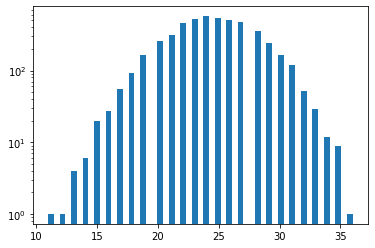

In [3]:
N = 50
totMCS = 5000

N_up = []



for i in range(0,totMCS):
    count = 0
    for j in range(0,N-1):
        tmp = rand.randrange(2)
        if tmp == 0:
            count = count+1
        elif tmp == 1:
            #do nothing
            tmp2 = tmp
        else:
            print("rand ", tmp, "out of range")
    
    #tmp2 = np.log(count)
    #N_up.append(tmp2)
    N_up.append(count)
    
log_N = np.log(N_up)

plt.hist(N_up,bins=53)
#plt.yscale("log")
plt.show()


## The Boltzmann factor

Now we are starting to see that it takes a lot of sampling to get an estimate for a thermodynamic quantity like entropy. In this case, we do ok because *every single randomly generated configuration is "good,"* where by "good" we mean useful. None of them get thrown away, like in the example where we computed the area of a circle.

But what if we are instead studying the paramagnetic in an external field, and in contact with a thermal bath at absolute temperature $T$? Now it is no longer the case that "all configurations are created equal." If the field is strong relative to the thermal energy scale, then the spins want to line up to the field, on average. If we generate configurations randomly, then many of them will be not terribly useful. In order to be more precise, we need to review the stat mech treatment of a paramagnet in an external field.

If we add an external field $\bf{B}$ then the energy of one of our spins in that field (we let the magnetic moment of our spins be $\mu$) is $-\bf{\mu\cdot B}$. Since we only have two possible orientations we can only have $\pm\mu B$. Without loss of generality we can let the $B$ field point up, and therefore a single up spin has an energy of $-\mu B$. The Hamiltonian for $N$ spins is therefore

$$H(C) = -\mu B \sum_{i=1}^N \sigma_i  \tag{Eq. 3}$$

where we have introduced $\sigma_i = \pm 1$ to denote the state of the ith spin.

Now it's time to recall/learn about the "Boltzmann factor." If a system is in contact with a thermal reservoir at absolute temperature $T$, it is no longer the case that all configurations are equally likely. Instead, configurations of lower energy are more likely:

$$P(C) \propto e^{-H(C)/k_BT}  \tag{Eq. 4}$$

where $k_B$ is Boltzmann's constant. The exponential factor is called the Boltzmann factor.

**Normalization and the partition function:** We can change the $\propto$ to an $=$ by demanding that $P({C})$ be normalized: 

$$1 = \sum_{\{C\}}P(C) = \frac{1}{Z}\sum_{\{C\}}e^{-H(C)/k_BT} \tag{Eq. 5}$$

The last sum is called the *partition function,* is abbreviated $Z(T)$, and is the normalization of the probability distribution:

$$\begin{align}
Z(T) = \sum_{\{C\}}e^{-H(C)/k_BT}  \tag{Eq. 5.5} \\
P(C) = \frac{e^{-H(C)/k_BT}}{Z(T)}  \tag{Eq. 6} \\
\end{align}$$

So, now imagine you want to compute, say, the average energy $\langle E\rangle$. One way to do this would be to recognize that given a probability distribution, we get averages in the following way:

$$\begin{align}
\langle E\rangle & = \sum_{\{C\}}P(C)H(C) \\
& = \sum_{\{C\}}H(C)\frac{e^{-H(C)/k_BT}}{Z(T)}  \tag{Eq. 7}
\end{align}$$

Therefore, if I generate a bunch of configurations completely at random as above, I add up the energies of each configuration, weighted by the Boltzmann factor.

**Question:** What's wrong with this strategy? (Hint: Think about how many configs you would effectively "throw out" in this scheme.)

## Metropolis sampling and detailed balance: To flip, or not to flip

Because of the problem just mentioned it is usually a bad idea to generate configurations completely at random. Instead, imagine that you already have a configuration that is "pretty good" in the sense that the energy is "low," where low is set by $k_BT.$ Then let's generate a new configuration by picking a spin at random and trying to flip it. If that flip would lower the system energy (i.e., align the spin to the field) then we do it. But if it would increase the system energy a bit, then we might do it with some probability. After all, the spins can "borrow" a little thermal energy from the bath to do work against the field, and so these types of moves should become more likely at higher temperature. Repeat this over and over again and you will eventually evolve to a whole new configuration of the lattice, but always staying near the relevant (high Boltzmann weight) part of configuration space.

But how do we set the probability to flip against the magnetic field? We can find a family of such rules by considering how the probability distribution changes in time as we flip spins. Let $W(C \rightarrow C^{\prime})$ be the (as yet undecided) rate at which we transition from configuration $C$ to $C^{\prime}$. Then the probability will evolve in time according to a simple gain/loss differential equation:

$$\frac{\partial P(C,t)}{\partial t} = \sum_{\{C^{\prime}\}}[ P(C^{\prime},t)W(C^{\prime} \rightarrow C) - P(C,t)W(C \rightarrow C^{\prime}) ] \tag{Eq. 8}$$

The first term is all of the configurations that flow *in* to configuration $C$ from any other configuration $C^{\prime}$, the second term is all of the configurations that flow *out* from $C$ to any other configuration $C^{\prime}$.

Now if we are at equilibrium, the probability distribution doesn't depend on time, so the L.H.S. is zero. In this case, all of the transitions flowing into $C$ must be balanced by transitions out of $C$. So, we can choose our transition rates $W$ (to flip, or not to flip?) any way that we want so long as they satisfy that criterion.

One way to do so is to demand that sum vanishes *term by term*: That is, for every pair of configs $C$ and $C^{\prime}$, demand that

$$ 0 = P(C^{\prime})W(C^{\prime} \rightarrow C) - P(C)W(C \rightarrow C^{\prime}) \tag{Eq. 9}$$

Rearranging, we obtain the *detailed balance* criterion:

$$\frac{P(C^{\prime})}{P(C)} = \frac{W(C \rightarrow C^{\prime})}{W(C^{\prime} \rightarrow C)}  \tag{Eq. 10}$$.

Next, we subsitute in the equilibrium probability distribution (Eq. 6):

$$\frac{e^{-H(C^{\prime})/k_BT}/Z(T)}{e^{-H(C)/k_BT}/Z(T)} =  \frac{W(C \rightarrow C^{\prime})}{W(C^{\prime} \rightarrow C)} \tag{Eq. 11}$$

**Notice:** the partition functions cancel. Rewriting the ratio of exponents, we finally arrive at the following expression:

$$e^{[H(C)-H(C^{\prime}]/k_BT} =  \frac{W(C \rightarrow C^{\prime})}{W(C^{\prime} \rightarrow C)} \tag{Eq. 12}$$

This expression is called "detailed balance." It says that we can use any rule that we want, so long as the forward and back rates balance in this way. If they do, you are *guaranteed* to sample from the Boltzmann distribution. Notice also that when you are considering whether or not to flip a spin, you only need to compute the Boltzmann factor for the current and new configurations --- very handy for numerical work!

## The Metropolis Rate

In a 1953 paper, Metropolis, Rosenbluth, Rosenbluth, Teller and Teller[1] proposed the following rate $W(C \rightarrow C^{\prime})$:

$$ W(C \rightarrow C^{\prime}) = \begin{cases}
  1 & \text{if  } \Delta H < 0 \\
  e^{-\Delta H/k_BT} & \text{if  } \Delta H > 0
  \end{cases}  \tag{Eq. 13}$$
  
where $\Delta H = H(C) - H(C^{\prime})$. In other words, if a spin flip lowers the overall energy, we let it happen. If it increases the overall energy, we let it happen with a probability $e^{-\Delta H/k_BT}$. 

**MC HW Problem 2:** Show that the Metropolis rate satisfies the detailed balance criterion.

**Aside**: The MC rate now known as the "Metropolis Rate" was developed in 1953 at Los Alamos National Lab. The last Teller in the list is Edward M Teller, the "father" of the hydrogen bomb (no matter how bad your kids turn out to be, at least they aren't h-bombs), and one of the models for the character of Dr. Strangeglove (the other was Herman Kahn). The other Teller was his wife. The Rosenbluths were also a husband wife team...at that time at LANL and elsewhere, it was the women who were the computer programmers. The computer was the MANIAC, and the code was written on stacks of punchcards. The simulation methods back then were mostly for weapons development. If you want to read a sordid tale of scientific rancor, read the Wikipedia article on Metropolis et al.

**The algorithm.** Here is how you implement the Metropolis rate for a MC simulation of something like an Ising model:

    initialize the lattice in a random config of up and down spins
    for i < totMCS
        for j < N   ## N is the total number of spins
            pick a spin at random
            compute its energy E0
            compute the energy E1 if it were to be flipped
            if E1 < E0
                flip it
            if E1 > E0
                compute P = exp[-(E1-E0)/kT]
                pick random number R uniformly distributed from [0,1)
                if R < P
                    flip the spin
                else
                    do nothing

Let's note a few things about this algorithm:

1. Instead of generating configurations uniformly and randomly and giving them a weight $e^{-H(C)/k_BT}$, we generate configurations with a probability $e^{-H(C)/k_BT}$, and weight them uniformly.
2. That means that if want to compute something like the average energy $\langle E \rangle$, we simply run the algorithm for a whole bunch of Monte Carlo sweeps, and record the total energy occasionally, then compute its arithmetic mean. So if we take a total of $M$ samples of the energy: $\langle E \rangle = \frac{1}{M}\sum_{i=1}^M E_i$
3. But how often should we sample the energy, or any other observable? Notice that the configurations that we generate in this manner are *correlated.* After we flip one spin, the configuration is almost the same as the last one. Even after we loop over all $N$ spins, it might still be very similar, depending on how "easy" it is to flip them.
4. For this reason, we say that algorithms like MC generate a "chain" of configurations. In this case, the chain is "Markovian," which means that each configuration only depends on the previous one. For that reason, we call this a "Markov chain Monte Carlo" (MCMC) algorithm.
5. A good computational physicist will try to get a handle on such correlations and try to account for them when estimating error bars. More on this later.
6. Notice that the initial config is random, and therefore doesn't look like a typical equilibrium config (except at infinite temperature). Therefore you have to discard some number of MC sweeps before recording data. There is no hard and fast rule for this --- it depends on the typical relaxation timescales in the system. 
7. Not all attempted "moves" are accepted. The ratio of successful to attempted moves is called the *acceptance ratio.* Clearly, there is some connection between the acceptance ratio and the efficiency of the algorithm (it should be neither too low nor too high), but again, there is no hard and fast rule for what it should be. What ultimately matters for the efficiency of a MC algorithm is the rate at which *uncorrelated* configurations (i.e., new informtation) are generated per unit *computer time.* 

Let's put the Metropolis algorithm to work on the Ising paramagnet in an external field. We will only have one parameter, which is $\mu B/k_BT$, The code produces two plots:
1. A plot of the energy of the system as a function of "time", i.e., MCS. I put "time" in inverted commas because there is no physical dynamics in this algorithm! 
2. A histogram of the energy. Note that this is a system coupled to a heat bath (ie, at constant temperature), and therefore the energy is not constant, it *fluctuates.* The distribution of energy is Gaussian, and the variance of the energy is related to the heat capacity via the fluctuation-dissipation theorem (more on this below).

There are lots of things to play with/check out in this code!
1. Look at how the energy fluctuates from one MCS to the next.
2. Check out how these fluctuations are compiled into the histogram
3. Try increasing/decreasing totMCS and note how the histo gets better/worse
4. Try changing temperature/magnetic field. Think about what you expect to happen to the energy histo as you increase/decrease temp at fixed B, or vice versa. Should it shift left? Right?
5. The code write the fraction of attemped spin flips that are successful. Think about what this number means for the numerical performance of the algorithm.


[1] "Equation of State Calculations by Fast Computing Machines," Metropolis, et al. *J. Chem. Phys.* **21**:1087-1092(1953)

Boltzm fact 0.1353352832366127
MC Acceptance rate:  0.2383388671875


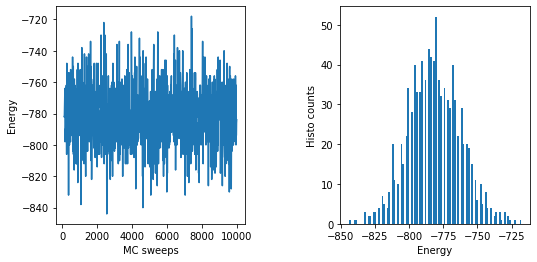

In [6]:
## a Metropolis MC algorithm for the paramagnet in an external field

# call this subroutine if you want to see the lattice config
def print_lattice(N, spins):
    for j in range(0,N):
        if (j+1)%L != 0:
            print("%3d" % spins[j],end='')
        else:
            print("%3d" % spins[j])
    print()
    print()
    return;

N = 1024
L = 32
write_freq = 10 # how frequently to 
#                 write data. see note above about sampling frequency
discard = 100  # how many MC sweeps to discard before writing data
totMCS = 10000 # this is the outer loop counter: 
#                total number of Monte Carlo Sweeps
muB = 1.0     # play with these to vary T, B
kT = 1.0      # 
Escale = muB/kT #this is uB/k_BT
#deltaE = -2.0*muB
Boltz_fact = np.exp(-2.0*Escale) # Boltzmann factor (Eq. 4) for flipping one spin
print("Boltzm fact", Boltz_fact) # precomputed since it is the same every 
#  time, because we only every flip one spin. exp is expensive to compute!
#  this saves a good amount of time

#  this list will hold our lattice
spins = []
E = [] # this will store the energy of configs
t = [] # this will store the "time" in MC sweeps
N_up_list = []

totN_up = 0

## initialize the lattice by randomly setting spins to up or down
for j in range(0,N):
    #generate either -1 or +1
    tmp = 2*rand.randrange(2) - 1
    spins.append(tmp)
    if tmp > 0:
        totN_up = totN_up + 1




## print lattice out at the beginning
#  print_lattice(N,spins)

data_file = open("energy.dat", "w")

N_succ = 0 # we will use this to track the "acceptance rate" --- how often 
            # an attempted spin flip is successful. 
for i in range(1,totMCS):
    
    #track the total number of up spins for computing enery, magnetization, etc
    totN_up = 0 
    # the following loop performs one MCS, selecting 
    # sites to update at random
    for j in range(0,N):
        site = rand.randrange(N)
        # pick a site a random
        # here we check the current state of the selected spin. we 
        # let the be field be in the positive direction. therefore, 
        # if the spin is down, flipping it lowers the energy. that is the 
        # first if condition
        # The following if/else statements implement the Metropolis rate (Eq. 13)
        if spins[site] < 0:
            spins[site] = 1
            totN_up = totN_up + 1
            N_succ = N_succ + 1 # successful attempt
        else: # it points up. so compute exp(-deltaE) and check against a rand
              # notice that we already know deltaE (it is 2*Escale), so we already computed
              # exp(-deltaE) outside the loop
            tmp = rand.random()
            if tmp < Boltz_fact:
                spins[site] = -1 # flip the spin
                N_succ = N_succ + 1 # successful attempt
            else:
                totN_up = totN_up + 1 # spin stays aligned to the field
    #print(totN_up)
    
    # check whether it is time to write some data. there are two 
    # conditions to check: are we beyond the initial number of discarded
    # configs, and are we at an integer multiple of the write frequency?
    if i > discard and i%write_freq == 0:

        t.append(i)
        Etmp = N - 2*totN_up
        E.append(Etmp)
        data_file.write("%d \n" % Etmp)
        
        
data_file.close()

#compute ratio of successful flips into total attempts: the success rate
acc_rate = N_succ/(N*totMCS)  
print("MC Acceptance rate: ",acc_rate)

## print the lattice at the end
#print_lattice(N,spins)

plt.figure(1, figsize=(8.5, 4))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(121)
ax.set_xlabel('MC sweeps')
ax.set_ylabel('Energy')
#ax.set_xlim(left=10000)
#ax.set_xlim(right=10500)
plt.plot(t,E)


ax2 = plt.subplot(122)
ax2.set_xlabel('Energy')
ax2.set_ylabel('Histo counts')
plt.hist(E,bins=100)

plt.show()



## Paramagnet physics

Above, we noted the importance of the partition function, $Z(\beta)$, where $\beta = 1/k_BT$. Recall that its central role in stat mech derives from the fact that you can obtain quantitaties like the average energy, the magnetization, or the heat capacity by taking appropriate derivatives of $\text{ln}Z$. For example, we obtain the average energy $\langle E \rangle$ by a derivative w.r.t $\beta$:

$$\begin{align}
-\frac{\partial \text{ln}(Z)}{\partial \beta}  & = -\frac{1}{Z}\frac{\partial}{\partial \beta} \sum_{\{C\}}e^{-\beta H(C)} \tag {Eq. 14}\\
& = -\frac{1}{Z}\sum_{\{C\}}H(C) e^{-\beta H(C)} \\
& = \langle E \rangle
\end{align}$$

**Work through these steps on your own!**

Now, normally computing the partition sum exactly is not possible (hence, MC methods), but in the case of the paramagnet it is. Let's recall how to do it. Substituting in the paramagnet Hamiltonian from above (Eq. 3) $H(C) = -\mu B \sum_{i=1}^N \sigma_i$:

$$\begin{align}
Z(\beta) & = \sum_{\{C\}}\left[\text{exp}\left(\beta \mu B  \sum_{i=1}^N \sigma_i\right)\right] \\
& = \prod_{j=1}^N\left[ \text{exp}\left(\beta\mu B\sum_{\sigma_j = \pm 1}\sigma_j\right)\right] \\
& = \prod_{j=1}^N\left[ e^{\beta\mu B} + e^{-\beta\mu B}  \right] \\
& = \left[ e^{\beta\mu B} + e^{-\beta\mu B}  \right]^N  \tag{Eq. 15}
\end{align}$$

**Work through these steps on your own!**

Now that we have the partition function for the paramagnet, we can compute the derivative that we need to obtain the average energy via Eq. 14: 
$$\begin{align}
\langle E \rangle & = -\frac{\partial}{\partial \beta} \text{ln}\left[ e^{\beta\mu B} + e^{-\beta\mu B}  \right]^N \\
& = -N \frac {\partial}{\partial \beta} \text{ln}\left[ e^{\beta\mu B} + e^{-\beta\mu B}  \right] \\
& = -N\mu B\left[\frac{e^{\beta\mu B} - e^{-\beta\mu B}}{e^{\beta\mu B} + e^{-\beta\mu B}}  \right] \\
& = -N\mu B \text{tanh}(\beta\mu B) \tag{Eq. 16}
\end{align}$$

**Work through these steps on your own!**

If you have taken thermo from us in DPA, you should recognize this expression! In any case, make a sketch of $\langle E \rangle$ as a function of $\frac{\mu B}{k_B T}$. Note the regions of high temperature/small field and low temperature/strong field, and use the code above to check that it roughly accords with the calculation. Or, if you are really bored, run the code for a range of $\frac{\mu B}{k_B T}$ and make plot of $\langle E \rangle$ and see that in follows the tanh predicted by the theory. 

We note a couple of things:
1. The average energy increases with $N$. This makes sense --- energy is an extensive quantity, after all.
2. The argument of the tanh is $\mu B/k_BT$. This means that the high temperature limit is defined by $\mu B << k_BT$. In this limit, we expect to see roughly equal numbers of up spins as down (entropy dominates).
3. The low T limit is defined by $\mu B >> k_BT$. In this regime, the magnetic field tends to align the spins, and the average energy approaches $-N\mu B$. 

**Question:** What about the regime in which $\langle E \rangle > 0$? Where is it?



## Fluctuations, heat capacity, and response functions 

Here we will derive an important relationship between fluctuations of the energy in the canonical ensemble and the heat capacity at constant volume. Recall that the heat capacity is 

$$C_V(T) = \frac{\partial \langle E \rangle}{\partial T} \tag{Eq. 17}$$

If we take the derivative of our expression just derived for $\langle E \rangle$:
$$\begin{align}
C_V & = \frac{\partial \langle E \rangle}{\partial T} \\
& = \frac{\partial}{\partial T}\left(\frac{\partial \text{ln}Z(\beta)}{\partial \beta} \right) \\
& = -\frac{1}{k_BT^2}\left[-\frac{1}{Z^2}\frac{\partial^2Z}{\partial \beta^2} + \frac{1}{Z^2}\left(\frac{\partial Z}{\partial\beta}\right)^2  \right] \\
& = -\frac{1}{k_BT^2}\left(\langle E^2 \rangle - \langle E \rangle^2 \right) \tag{Eq. 18}
\end{align}$$

**Work through these steps on your own!**

So: The heat capacity is proportional to the fluctuations in the energy. (If you don't see that this is a fliuctuation, wait another paragraph.) This is an instance of a "fluctuation-response" theorem, which relates fluctuations in a quantity at equilibrium to the response of the system, in this case to a change in temperature in response to the transfer of heat. (There is a similar relation for the magnetization and the magnetic susceptibility, which you will explore in project 3.) Later, we will see that fluctuations (and therefore the heat capacity) diverge at a *critical point,* where a system passes through a continuous phase transition.

**The energy is Gaussian-distributed in the canonical ensemble.** Above, we derived a relationship between the fluctuations in the energy and the heat capacity. Here, we will consider more closely how the energy distributes itself around its mean value in the canonical ensemble. Consider sampling many values of the energy in a MC simulation, labelled $E_i$, and then consider the quantity

$$E_i - \langle E \rangle \tag{Eq. 19}$$

This is the deviation of the energy of a particular configuration from the average energy, computed from many configurations. Collect this in=fo for a bunch of configurations $i$ and it tells you how the energy is distributed around its mean. But how likely is a fluctuation of a particular size? For this we need to consider some kind of *average deviation.* Consider (dropping the $i$ subscript)

$$\begin{align}
\sigma_E^2 & \equiv \langle \left( E - \langle E \rangle \right) ^2 \rangle \tag{Eq. 20}\\
& = \langle E^2 \rangle - \langle E \rangle ^2 \tag{Eq. 21}
\end{align}$$

I squared it to get a positive quantity. The reason why I called this quantity $\sigma_E^2$ is because it *is* the variance of the distribution of the energy. The second line shows us that it is related to the heat capacity via the fluctuation-response theorem --- compare to Eq. 18. 

Moreover, if we imagine our samples of the energy $E_i$ to be taken from an infinitely long Monte Carlo simulation, with infinitely many MC sweeps in between them, then they must be *independent* of one another. If we take independent samples from a "well-behaved" distribution (i.e., one with a finite variance), then the central limit theorem tells us that those deviations from the mean must be Gaussian distributed. In other words:

$$P(E) = \text{exp}\left( \frac{(E-\langle E \rangle)^2}{2\sigma_E^2}  \right) \tag{Eq. 22}$$

So, now we know a couple more things about our energy histogram that we plotted above:
1. It is a Gaussian (well, approximately Gaussian for big enough $N$). 
2. The variance of the distribution of the energy is directly proportional to the heat capacity. 
3. Note the assumption of "well-behaved" above. This assumption is violated at a critical point, where the system undergoes a second order phase transition. At such a point, fluctuations in the energy are observed on *all scales,* and therefore the heat capacity diverges.


## Finite sampling errors and error bars

In motivating the use of the central limit theorem, we assumed an infinitely long MC simulation. This is of course never the case in practice, but how long is long enough? To answer this, we have to think more pragmatically about the goals of molecular simulation. (This applies to all simulations, not just MC.)

We *don't* do simulations to make nice pictures (although they can help make a point, and get your work featured on journal covers). Rather, we want to *measure* something in the computer --- the average energy, or the magnetization, or the heat capacity. If you run a long MC simulation, compute the average energy, and report that number, you are not finished! This is because if you run the simulation again, you will get a different value for the average energy --- there is an error bar, that arises from finite sampling. If you gave me $M$ *independent* measurements (or estimates) of $\langle E \rangle$, then it is easy to compute the error bar: Just take the standard deviation of the estimates, and divide by the square root of $M-1$. This is called the "standard error on the mean." It's a little confusing, so let me go through it step by step:
1. Run a MC simulation and compute the average energy. Note that this is an *estimate* of $\langle E \rangle$. For that reason I will call it $\bar{E}_i$. I give it an index since we will do this over and over.
2. Run M simulations like this, and for each one compute $\bar{E}_i$.
3. Average $\bar{E}_i$ to get your best estimate of $\langle E \rangle$ from the available data: $\bar{E} = (\sum_{i=1}^M \bar{E}_i)/M$
4. But how good is that estimate? What error bar do you report along with it? This is provided by the standard error:

$$\text{SE} = \frac{\sqrt{\sum_{i=1}^M (\bar{E}_i - \bar{E})^2}}{\sqrt{(M-1)}}$$

*Remember:* We have said several times in the preceding discussion that the samples $E_i$ are *independent.*

*Always* think about whether it makes sense to report an error bar with a number computing from a simulation! (It usually does. Or if you don't, you had better explain why.)

**Sampling errors from a single simulation.** We started this discussion by asking "how long is long enough?" Then we discussed finite sampling errors, using multiple MC simulations to make the point. But now we return to the "how long" question, pointing out that over the course of a long MC simulation we should obtain independent samples, provided that we don't sample too frequently. How do we decide how many MC steps to discard between samples?

The answer is provided by the correlation time --- after all, independent means uncorrelated. The procedure is therefore to measure the autocorrelation function, and determine the characteristic time $\tau$ over which "memory" of previous configurations persists. If you sample configurations no more frequently than $tau$, you can reasonably expect them to be independent, and treat them as such in your error analysis. Below, we will show this for our paramagnet, but the results are boring. They are more interesting for the ferromagnet that you will study in the project 3.

**Aside:** There is a more clever way to do this, reported in a J. Chem. Phys. article by Flyvbjerg and Petersen in 1989 (although they note that it is not their idea, they don't know where it came from, but they are reporting it for posterity). The basic idea is that if you compute the error from data that are sampled too frequently, you will underestimate errors --- variance will be lower, and $M$ is too big. However, in the regime where samples are independent, the error estimate is invariant under subsampling transformations. You should read this article if you work in computer simulation.


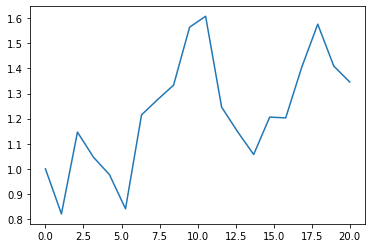

In [4]:
#import pandas as pd
#open the energy data from the MC sim
#rh = open("energy.dat", "r")

Edat = np.loadtxt("energy.dat")

#MCtime = []

#count = -1
#for line in rh:
#    count = count + 1
#    Edat.append(line)
#    MCtime.append(count)

max_tau = 20
totalT = len(Edat)
#print(totalT)

C_t = []

total = 0
for i in range(0,totalT):
    total = total + Edat[i]

avgE = total/totalT

for tau in range(0,max_tau):
    total = 0

    M = 0
    for j in range(0,totalT-max_tau):
        M = M+1
        total = total + Edat[j]*Edat[j+tau]
    
    
    avg = total/M - avgE**2
    C_t.append(avg)

M = len(C_t)
#print(M)
var = C_t[0]
for i in range(0,M):
    #print(C_t[i])
    C_t[i] = C_t[i]/var
    #print(C_t[i])

#M = len(C_t)
#print(M)
t_axis = np.linspace(0,M,M)

plt.plot(t_axis,C_t)
plt.show()


## Phase transitions and the ferromagnet: A prelude

The basic concept of a phase transition is familar from everyday life --- think of water freezing and melting, or boiling and condensing. We have the idea that there is somehow involved a transition from a more ordered state to a less ordered thermodynamic state, or vice versa. (There are also transitions between states of different crystal symmetry, but we will ignore them here.)

How is a phase transition identified? One approach is to consider an *order parameter* which discriminates between the two phases. The order parameter for the liquid-vapor transition is the density --- the more dense phase is the liquid, the less dense phase the vapor. Recall from your thermo/stat mech that the boundary between the liquid and the vapor ends at a *critical point.* If you cross the boundary below the critical point, the density changes discontinuously. If you go right through the critical point, the density changes continuously as you go from vapor to fluid. The former is called a "first order" or dicontinuous phase transition, the latter a "2nd order" or "continuous" phase transition. At a first order phase transition, the derivative of free energy is discontinuous, while at a continuous transition it is continuous.

Whether there exists a continuous transition (critical point, or line of critical points) between two phases is fundamentally related to the symmetry of the two phases. They must have the same symmetry in order for a critical point to exist (otherwise there is no way to continuously go from one to the other). 

The simple paramagnet that we have been studying so far is boring in this regard. Even though it is more or less ordered as $\mu B/k_BT$ is varied, there is no phase transition that separates these regions. For that, we need to consider the ferromagnetic Ising model. The Hamiltonian is

$$H(C) = -\mu B \sum_{i=i}^N\sigma_i - J\sum_{\langle i,j \rangle} \sigma_i\sigma_j$$

The notation $\langle i,j \rangle$ means "sum over nearest neighbors only." The ferromagnetic Ising model thus includes a coupling that tends to locally align the spins. Notice that the dimension now matters: On a one dimensional lattice of spins, each spin only has two neighbors, in 2D it has 4, and in 3D it has 6. 

The order parameter for the Ising model is the magnetisation per spin $m$:

$$m = \frac{1}{N}\mu\sum_{i=i}^N\sigma_i $$

which is positive when the spins are aligned to the field, and negative when they are on average antiparallel. In project 3, you will study the phase transitions in the ferromagnetic Ising model for $B = 0$ and $B \neq 0$. When $B \neq 0$, the system has a first-order transition --- as a function of temperature, there is a discontinuous jump in the magnetization as temperature is increased. At $B=0$, there is a critical point which occurs at a critical temperature $T_c = 2.269$. Above this temperature the system is disordered. Below $T_c$ the nearest neighbor interactions favor alignment of the spins. Since this happens in the absence of a magnetic field there is no difference anymore between up and down, and the system randomly selects a direction. This phenomenon is therefore called "spontaneous symmetry breaking," since the up/down symmetry is broken in the absence of something (like a magnetic field) to pick a direction.

**1st order transitions: Hysteresis** A system that has a 1st order transition will display *hysteresis.* This means that the transition occurs at different values of the control parameter ($T$ or $B$) in each direction (increasing or decreasing the control parameter). An example is shown in the figure:<img src="./hysteresis.jpg" alt="drawing" width="400"/>

At a first order transition, the low temperature phase appears first as "droplets" of a characteristic size --- we say that it is nucleated. Forming such a droplet requires paying the cost of the boundary (think of surface tension for a liquid droplet in vapor), and so you have to "overshoot" the phase boundary in order to form the phase. However, the exact way in which this happens is history-dependent, hence the name "hysteresis."

**2nd order transitions: Scaling, critical exponents, and critical slowing down.** Second-order transitions are way more interesting. In contrast to 1st order transistions, at which a characteristic scale (droplet size) defines the length over which correlated fluctuations occur, at a 2nd order transition this lengthscale *diverges.* This behavior is captured by considering the correlation length $xi$, which measures the lengthscale over which a pair of spins are correlated:

$$\xi \propto \left| T - T_c\right|^{-\nu}$$

For the 2D Ising model, $\nu=1$ The magnetization also diverges at the critical point. As the system is cooled through the critical temperature $T_c$ from below, the magnetization scales like:

$$M \propto \left(T_c-T\right)^{\beta}$$

with $\beta = 1/8$, obtained analytically by Onsager in the 50's. The response functions (heat capacity and magnetic susceptibility) also also diverge at the critical point, with their own exponents. 

One of the most remarkable discoveries in modern physics is the existence of *universality.* The exponents that describe the divergences at the critical point depend only on dimension, symmetry group of the Hamiltonian, and the range of the interaction (short or long). *Thus the Ising model (in 3D) and the van der Waal's fluid have the same exponents.* 

**Finite size and the thermodynamic limit.** In a finite system, nothing diverges, and simulations are always (very) finite. As you approach a critical point from above, the correlation length grows, but at some point it hits the edge of the simulatied lattice. I cannot grow without bound, and all divergences are "rounded off." There is an extensive literature from the 80's (espcially David Landau, Bob Swendsen, Michael Fisher), but as a simple practical check one may simply compute response functions for systems of increasing size. 

*Aside: Periodic Boundary Conditions.* Speaking of which...what do we do about edge effects? By far the most common solution is to use periodic boundary conditions: The neighbors to the right of a spin on the far right edge are the first column on the left, etc. Note that this is still a finite system --- if the lattice is of size $L$, you cannot observe fluctuations with lengthscales longer than $L$. 


